In [1]:
from os import path
import pandas as pd
from defi_econ.constants import DATA_PATH

In [2]:
data = pd.read_csv(path.join(DATA_PATH, "data_regression/regression_data_sample_standard.csv"), index_col = ['symbol', 'date'])
data

eigencentrality  asset_price  price_volatility   gas_fee  \
symbol date                                                                 
USDC   20220517         0.878769    -0.540391         -0.735647 -0.303356   
       20220524         0.859891    -0.540391          0.006257 -1.044558   
       20220531         0.876787    -0.540391         -0.340492  1.347914   
WETH   20220517         1.000000    -0.370715          0.665178 -0.303356   
       20220524         1.000000    -0.374952          1.033660 -1.044558   
       20220531         1.000000    -0.373472          1.836813  1.347914   
DAI    20220517         0.499025    -0.540391         -0.380995 -0.303356   
       20220524         0.465341    -0.540391          0.440927 -1.044558   
       20220531         0.405181    -0.540391          0.629614  1.347914   
WBTC   20220517         0.465050     1.965393          0.189016 -0.303356   
       20220524         0.492901     1.903015          0.609856 -1.044558   
       20220531         0.487446     2.114252          0.760015  1.347914   
USDT   20220517         0.519065    -0.540391         -1.805529 -0.303356   
       20220524         0.519065    -0.540391         -1.805529 -1.044558   
       20220531         0.520976    -0.540391         -1.103141  1.347914   

                  gas_vol  market_cap  aave_deposit  aave_borrow  \
symbol date                                                        
USDC   20220517  0.792097    0.764450      0.518329     1.484771   
       20220524  0.618563    0.806065      1.256483     1.234068   
       20220531 -1.410660    0.822596      1.010450     1.049730   
WETH   20220517  0.792097   -0.679510      1.238573     0.567450   
       20220524  0.618563   -0.690268      1.305302     0.970877   
       20220531 -1.410660   -0.694019      1.337586     1.060332   
DAI    20220517  0.792097   -0.885346     -1.258630    -0.590359   
       20220524  0.618563   -0.880339     -1.112101    -0.433023   
       20220531 -1.410660   -0.876252     -1.470149    -1.034924   
WBTC   20220517  0.792097   -0.797915      0.034190    -1.430805   
       20220524  0.618563   -0.813121     -0.381200    -1.449194   
       20220531 -1.410660   -0.791056     -0.081372    -1.416064   
USDT   20220517  0.792097    1.611526     -0.893373     0.056177   
       20220524  0.618563    1.611526     -0.893373     0.056177   
       20220531 -1.410660    1.491663     -0.610716    -0.125213   

                 compound_supply  compound_borrow  volume_gross  volume_in  \
symbol date                                                                  
USDC   20220517         1.100532         0.777050      0.965736   0.879333   
       20220524         0.484417         0.839209      0.667455   0.699634   
       20220531         0.455371         0.764992      1.080454   1.218490   
WETH   20220517         1.453107        -0.678885      1.647132   1.779852   
       20220524         1.425817        -0.808818      1.148782   1.070636   
       20220531         0.992542        -1.250596      1.549171   1.375939   
DAI    20220517         0.244929         1.772442     -1.050899  -1.062511   
       20220524        -0.136172         0.807825     -1.095096  -1.099632   
       20220531        -0.190680         0.666523     -1.079396  -1.138191   
WBTC   20220517        -1.599464        -1.375739     -0.469732  -0.527627   
       20220524        -1.602918        -1.375743     -0.750662  -0.669731   
       20220531        -1.603380        -1.375743     -0.513294  -0.416791   
USDT   20220517        -0.246280         0.424115     -0.622469  -0.635081   
       20220524        -0.246280         0.424115     -0.622469  -0.635081   
       20220531        -0.531541         0.389254     -0.854713  -0.839241   

                 volume_out  defi_deposit  defi_borrow  
symbol date                                             
USDC   20220517    1.046010      0.865375     1.501720  
       20220524    0.630306      1.054809     1.3323

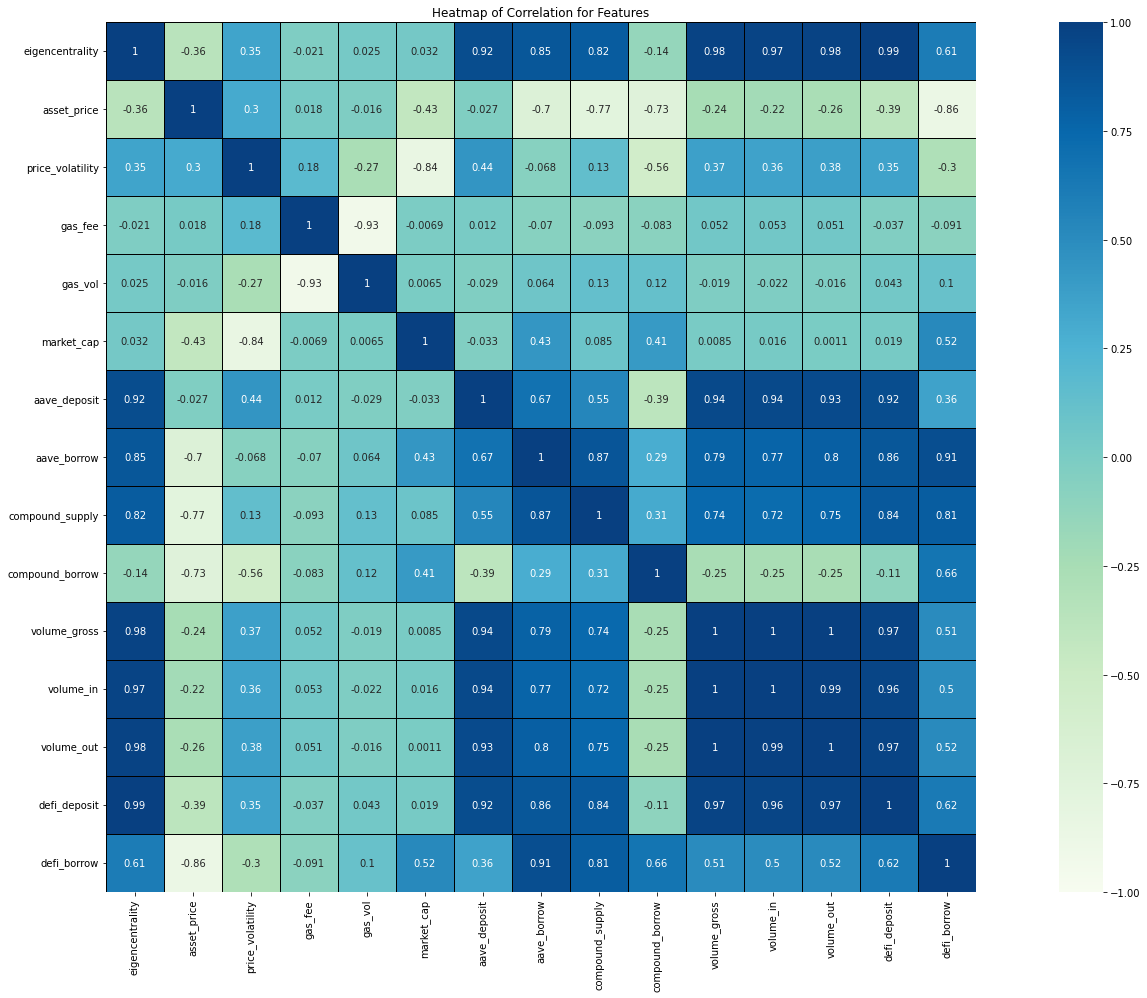

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches(30, 16)
plt.title("Heatmap of Correlation for Features")
fig=sns.heatmap(data.corr(), annot=True, cmap='GnBu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

In [4]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

exog_vars=['gas_fee', 'gas_vol', 'asset_price', 'price_volatility', 'market_cap','defi_deposit','defi_borrow']
exog=sm.add_constant(data[exog_vars])

endog = data['eigencentrality']

mod = PooledOLS(endog, exog, check_rank=False)
# pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
pooledOLS_res = mod.fit()

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [5]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:        eigencentrality   R-squared:                        0.9896
Estimator:                  PooledOLS   R-squared (Between):              0.9996
No. Observations:                  15   R-squared (Within):              -0.4829
Date:                Fri, Jul 29 2022   R-squared (Overall):              0.9896
Time:                        11:55:42   Log-likelihood                    35.254
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      94.769
Entities:                           5   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                     F(7,7)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             94.769
                            

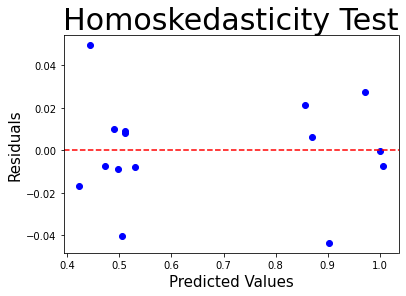

In [6]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [7]:
from linearmodels import PanelOLS
exog_vars=['gas_fee', 'gas_vol', 'asset_price', 'price_volatility', 'market_cap','defi_deposit','defi_borrow']
exog=data[exog_vars]

endog = data['eigencentrality']

# fix individual effects, time effects
reg_fe=PanelOLS(endog,exog,entity_effects=False,time_effects=True, check_rank=False, drop_absorbed=True)
results_fe=reg_fe.fit()

print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:        eigencentrality   R-squared:                       -7.7176
Estimator:                   PanelOLS   R-squared (Between):             -7.7609
No. Observations:                  15   R-squared (Within):              -0.5137
Date:                Fri, Jul 29 2022   R-squared (Overall):             -7.7118
Time:                        11:55:43   Log-likelihood                   -15.195
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -1.7706
Entities:                           5   P-value                           1.0000
Avg Obs:                       3.0000   Distribution:                     F(4,8)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             0.1967
                            

/var/folders/sn/bpd3y67s50v2b2bzrzmw_jlc0000gn/T/ipykernel_24129/1042483157.py:9: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

gas_fee, gas_vol

  results_fe=reg_fe.fit()


In [8]:
from linearmodels import RandomEffects
import statsmodels.api as sm

exog_vars=['gas_fee', 'gas_vol', 'asset_price', 'price_volatility', 'market_cap','defi_deposit','defi_borrow']
exog=sm.add_constant(data[exog_vars])

endog = data['eigencentrality']

reg_re=RandomEffects(endog, exog, check_rank=False)
results_re=reg_re.fit()
print(results_re)


                        RandomEffects Estimation Summary                        
Dep. Variable:        eigencentrality   R-squared:                        0.9896
Estimator:              RandomEffects   R-squared (Between):              0.9996
No. Observations:                  15   R-squared (Within):              -0.4829
Date:                Fri, Jul 29 2022   R-squared (Overall):              0.9896
Time:                        11:55:43   Log-likelihood                    35.254
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      94.769
Entities:                           5   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                     F(7,7)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             94.769
                            

In [9]:
from linearmodels.panel import compare
print(compare({'Pooled':pooledOLS_res,'RE':results_re,'FE':results_fe}))

                                  Model Comparison                                 
                                     Pooled                  RE                  FE
-----------------------------------------------------------------------------------
Dep. Variable               eigencentrality     eigencentrality     eigencentrality
Estimator                         PooledOLS       RandomEffects            PanelOLS
No. Observations                         15                  15                  15
Cov. Est.                        Unadjusted          Unadjusted          Unadjusted
R-squared                            0.9896              0.9896             -7.7176
R-Squared (Within)                  -0.4829             -0.4829             -0.5137
R-Squared (Between)                  0.9996              0.9996             -7.7609
R-Squared (Overall)                  0.9896              0.9896             -7.7118
F-statistic                          94.769              94.769             